Clustering

Cho tập dữ liệu card_data.csv gồm các cột sau : 
country Name of the country 
child_mort Death of children under 5 years of age per 1000 live births 
exports Exports of goods and services per capita. Given as %age of the GDP per capita 
health Total health spending per capita. Given as %age of GDP per capita 
imports Imports of goods and services per capita. Given as %age of the GDP per capita 
Income Net income per person 
Inflation The measurement of the annual growth rate of the Total GDP 
life_expec The average number of years a new born child would live if the current mortality patterns 
are to remain the same
total_fer The number of children that would be born to each woman if the current age-fertility rates 
remain the same.
gdpp The GDP per capita. Calculated as the Total GDP divided by the total population.

Yêu cầu : 
1. Scale data với phương pháp thích hợp. 
2. Xây dựng 3 mô hình clustering : KMeans, Agglomerative Clustering, GMM trên tập data 
trên. Lựa chọn số cluster phù hợp cho mỗi mô hình, kèm theo giải thích. Vẽ biểu đồ minh 
họa. 
3. PCA với n_components = 2 trên tập data đã qua xử lý. Tiến hành chọn 1 trong 3 thuật toán ở 
câu 2, kèm số lượng cluster đã chọn ở câu 2 để fit trên tập data vừa được giảm chiều bởi 
PCA. 
4. Visualize tập data đã qua xử lý PCA, vẽ 1 đồ thị 2D, trong đó các điểm cùng thuộc 1 cluster 
sẽ có cùng 1 màu (ví dụ như hình bên dưới). Giải thích ý nghĩa của từng cluster dựa trên 
các thông tin thu được. 

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("clustering/Country-data.csv",index_col=0)

In [4]:
data.head()

,child_mort,health,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,
Afghanistan,90.2,7.58,1610,9.44,56.2,5.82,553
Albania,16.6,6.55,9930,4.49,76.3,1.65,4090
Algeria,27.3,4.17,12900,16.10,76.5,2.89,4460
Angola,119.0,2.85,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,6.03,19100,1.44,76.8,2.13,12200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   health      167 non-null    float64
 2   income      167 non-null    int64  
 3   inflation   167 non-null    float64
 4   life_expec  167 non-null    float64
 5   total_fer   167 non-null    float64
 6   gdpp        167 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 10.4+ KB


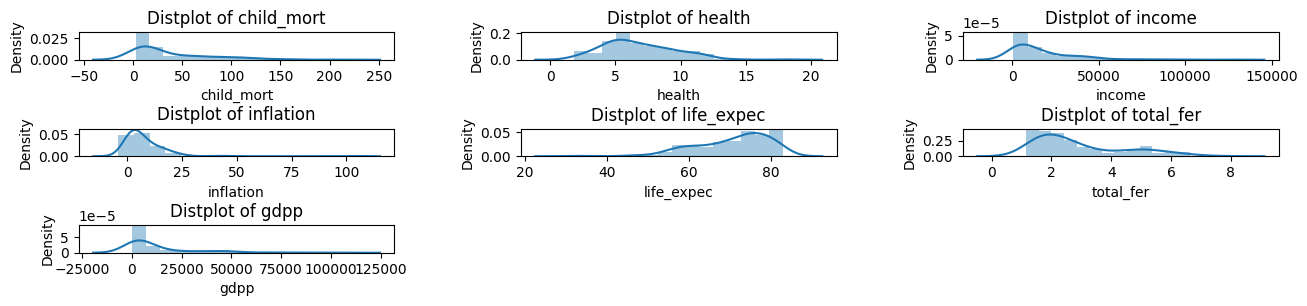

In [6]:
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
plt.figure(1 , figsize = (15 , 6))
n = 1 
for x in data.columns.to_list():
    
    plt.subplot(6 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(data[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
    n = n+1
plt.subplots_adjust(left=0.1,
                    bottom=0.05,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=2.5)
plt.show()

In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

features = ['child_mort', 'health', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
X = data[features]

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

data = pd.DataFrame(X_scaled, columns=features)

In [8]:
data.head()

,child_mort,health,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.358608,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.294593,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.146675,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.064636,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.262275,0.148652,0.052213,0.881657,0.154574,0.114242


In [9]:
from sklearn.cluster import KMeans
X1 = data.values # dataframe -> array
inertia = []
for n in range(3 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=500, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

  File "d:\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
  File "d:\Python\Python310\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "d:\Python\Python310\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "d:\Python\Python310\lib\subprocess.py", line 1440, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


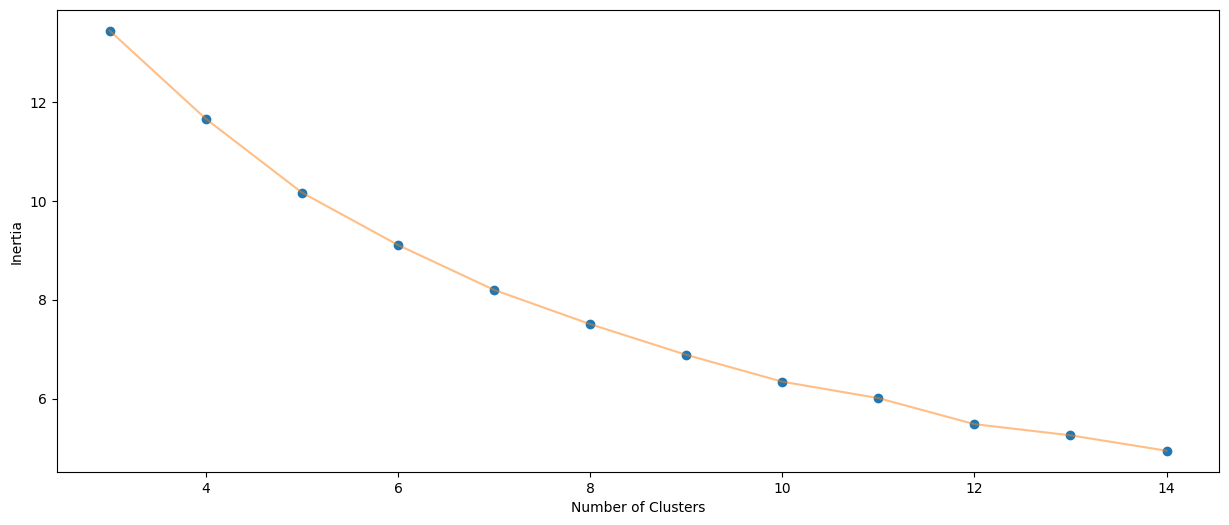

In [10]:
import numpy as np
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(3 , 15) , inertia , 'o')
plt.plot(np.arange(3 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

12
7


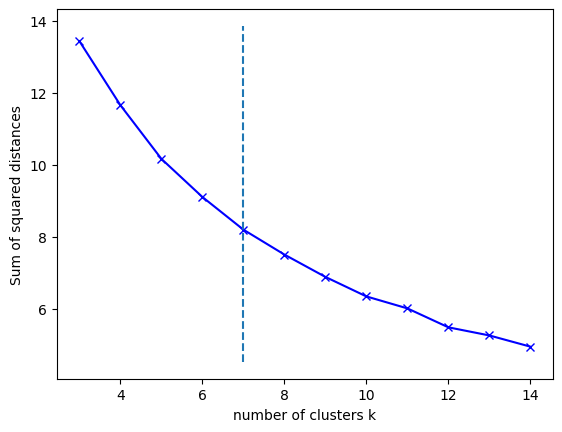

In [11]:
y = inertia
print(len(y))

x = range(3, 15)
from kneed import KneeLocator
kn = KneeLocator(x, y, curve='convex', direction='decreasing')
print(kn.knee)


import matplotlib.pyplot as plt
plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.plot(x, y, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

Nhận xét: Qua biểu đồ trên chỉ ra rằng đối với Kmean thì k =7 là tốt nhất.

In [12]:
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_samples, silhouette_score

n_clusters=np.arange(3, 15)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    gmm=GaussianMixture(n, n_init=2).fit(data) 
    labels=gmm.predict(data)
    silhouette_avg = silhouette_score(data, labels,metric='euclidean')
    sils.append(silhouette_avg)
    print("Clustering with n = {0} clusters, avg silhoutte score = {1}".format(n,silhouette_avg))

Clustering with n = 3 clusters, avg silhoutte score = 0.27105500515496034
Clustering with n = 4 clusters, avg silhoutte score = 0.18714012628840246
Clustering with n = 5 clusters, avg silhoutte score = 0.21144477459790062
Clustering with n = 6 clusters, avg silhoutte score = 0.2036362942597633
Clustering with n = 7 clusters, avg silhoutte score = 0.16300883178422065
Clustering with n = 8 clusters, avg silhoutte score = 0.22409504292997928
Clustering with n = 9 clusters, avg silhoutte score = 0.13363108032146723
Clustering with n = 10 clusters, avg silhoutte score = 0.24172955728401652
Clustering with n = 11 clusters, avg silhoutte score = 0.19843116174471884
Clustering with n = 12 clusters, avg silhoutte score = 0.20874663074754046
Clustering with n = 13 clusters, avg silhoutte score = 0.22931358410267758
Clustering with n = 14 clusters, avg silhoutte score = 0.23353764082642423


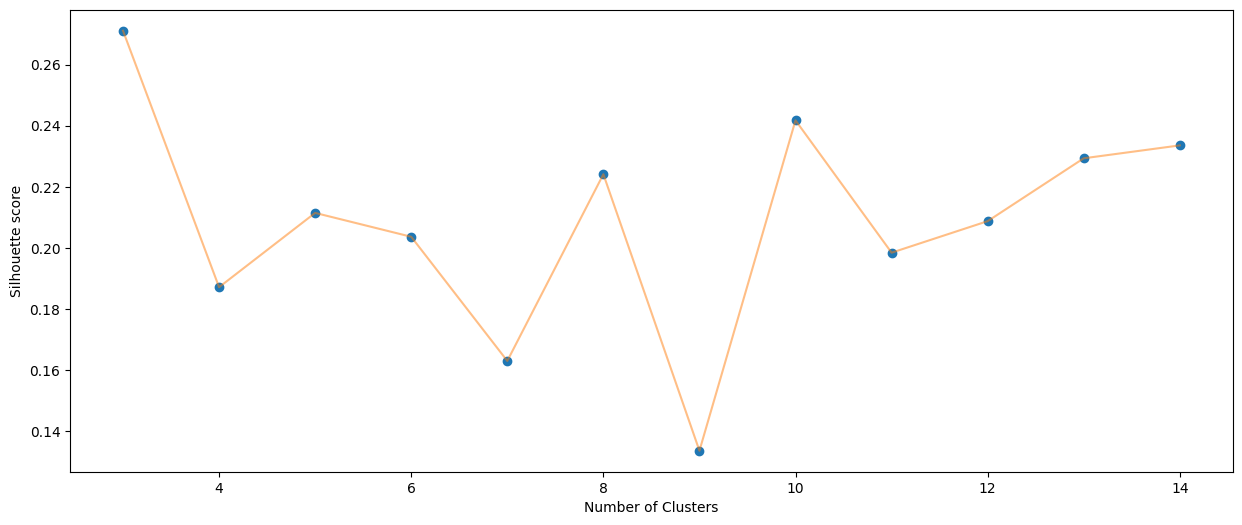

In [13]:
import numpy as np
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(3 , 15) , sils , 'o')
plt.plot(np.arange(3 , 15) , sils , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Silhouette score')
plt.show()

Nhận xét:
Qua biểu đồ trên có thể thấy đối với GMM thì n = 3 là cao nhất do đó n = 3 là tốt nhất.

Clustering with n = 3 clusters, avg silhoutte score = 0.38614661025417435
Clustering with n = 4 clusters, avg silhoutte score = 0.2670686115317291
Clustering with n = 5 clusters, avg silhoutte score = 0.28388831229868633
Clustering with n = 6 clusters, avg silhoutte score = 0.2453768686837784
Clustering with n = 7 clusters, avg silhoutte score = 0.26303612175828106
Clustering with n = 8 clusters, avg silhoutte score = 0.26079634227787113
Clustering with n = 9 clusters, avg silhoutte score = 0.2672014279698578
Clustering with n = 10 clusters, avg silhoutte score = 0.27193282793718593
Clustering with n = 11 clusters, avg silhoutte score = 0.24931169677949885
Clustering with n = 12 clusters, avg silhoutte score = 0.2565519924822024
Clustering with n = 13 clusters, avg silhoutte score = 0.25706919843685877
Clustering with n = 14 clusters, avg silhoutte score = 0.2597990696679359


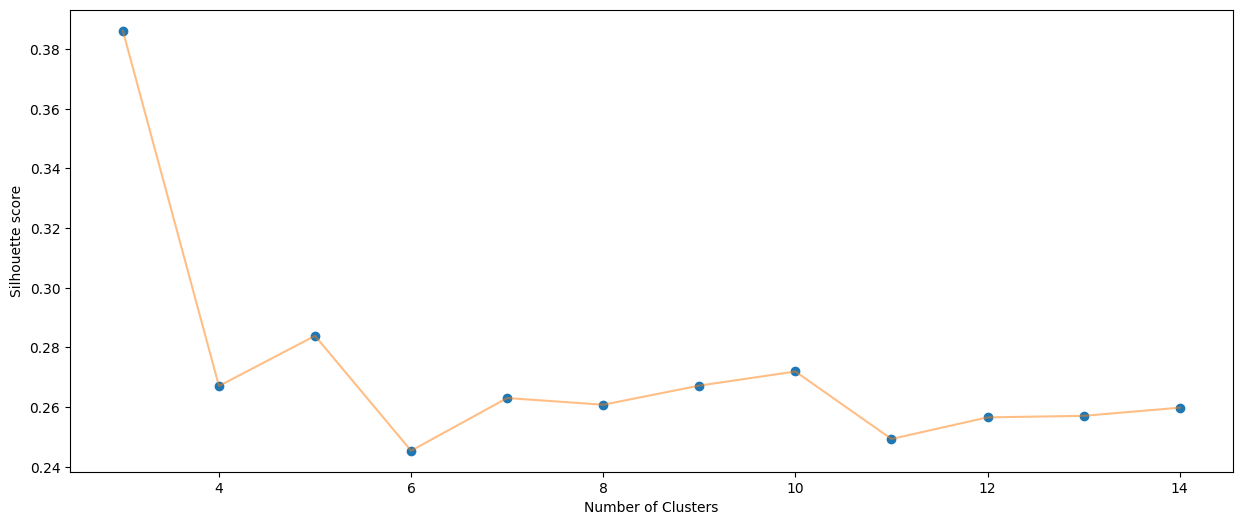

In [14]:
from sklearn.cluster import AgglomerativeClustering
n_clusters=np.arange(3, 15)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    agg=AgglomerativeClustering(n).fit(data) 
    labels=agg.labels_
    silhouette_avg = silhouette_score(data, labels,metric='euclidean')
    sils.append(silhouette_avg)
    print("Clustering with n = {0} clusters, avg silhoutte score = {1}".format(n,silhouette_avg))
import numpy as np
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(3 , 15) , sils , 'o')
plt.plot(np.arange(3 , 15) , sils , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Silhouette score')
plt.show()

Nhận xét:
Qua biểu đồ trên cho thấy với Agglomerative thì n = 3 là cao nhất do đó với Agglomerative thì n = 3 là tốt nhất.

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

In [16]:
X1 = data_pca # dataframe -> array
inertia = []
algorithm = AgglomerativeClustering(n_clusters =3)
algorithm.fit(X1)

AgglomerativeClustering(n_clusters=3)

In [17]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter(
    x= data_pca[:,0],
    y= data_pca[:,1],
    mode='markers',
     marker=dict(
        color = algorithm.labels_, 
        size= 10,
        line=dict(
            color= algorithm.labels_,
            width= 12
        ),
        opacity=0.8
     )
)
datab = [trace1]
layout = go.Layout(
    title= 'Clusters wrt AgglomerativeClustering and PCA',

)
fig = go.Figure(data=datab, layout=layout)
py.offline.iplot(fig)

In [20]:
principal_components = pca.components_
principal_components

array([[ 0.48732146, -0.14370017, -0.30530272,  0.08861405, -0.43083831,
         0.58313142, -0.33932573],
       [ 0.26822925,  0.53543497,  0.37173972, -0.0275395 , -0.07734107,
         0.39066099,  0.58635823]])

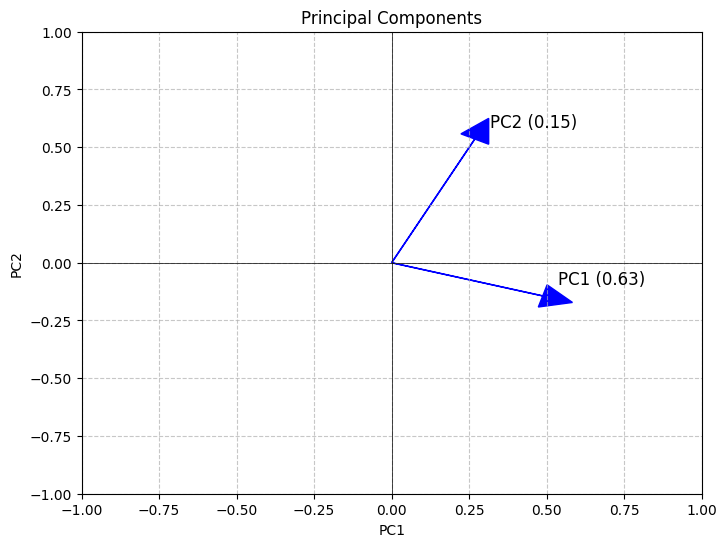

In [ ]:
plt.figure(figsize=(8, 6))
for i, (pc, var_ratio) in enumerate(zip(principal_components, pca.explained_variance_ratio_)):
    plt.arrow(0, 0, pc[0], pc[1], head_width=0.1, head_length=0.1, fc='blue', ec='blue')
    plt.text(pc[0] + 0.05, pc[1] + 0.05, f'PC{i+1} ({var_ratio:.2f})', fontsize=12)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Components')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [23]:
components_1 = pd.DataFrame(pca.components_[0],index=data.columns)
components_1.sort_values(by = 0,ascending=False)

,0
total_fer,0.583131
child_mort,0.487321
inflation,0.088614
health,-0.143700
income,-0.305303
gdpp,-0.339326
life_expec,-0.430838


In [25]:
components_2 = pd.DataFrame(pca.components_[1],index=data.columns)
components_2.sort_values(by = 0,ascending=False)

,0
gdpp,0.586358
health,0.535435
total_fer,0.390661
income,0.371740
child_mort,0.268229
inflation,-0.027540
life_expec,-0.077341


Giải thích:

components_1 chủ yếu được đóng góp bởi các feature là total_fer và child_mort, hai yếu tố này nói lên sự tăng dân số hay tỷ lệ sinh.
components_2 chủ yếu được đóng góp bởi các feature là gdpp, health, total_fer, income và child_mort, các yếu tố này nói lên mức sống.

Từ kết quả clustering của hình Clusters wrt AgglomerativeClustering and PCA, với PC1 là trục x và PC2 là trục y ta có thể chia thành 3 nhóm người dùng:

+ Nhóm 1 (vàng): Là nhóm có tỷ lệ sinh thấp nhất nhưng mức sống cao nhất, hay nói cách khác là nhóm giàu nhưng không muốn sinh nhiều con.
+ Nhóm 2 (xanh): Là nhóm có tỷ lệ sinh trung bình, khá trải dài mức sinh và mức sống thấp nhất. Đây là nhóm thu nhập thấp và mức sinh vừa.
+ Nhóm 3 (hồng): Là nhóm có tỷ lệ sinh cao nhất và mức sống trung bình, nhóm này là nhóm trung lưu và sinh nhiều con.